In [1]:
import matplotlib.pyplot as plt

In [2]:
# !brew install tesseract

In [3]:
# import cv2
# import numpy as np
# import matplotlib.pyplot as plt
# from collections import defaultdict
# import math

# # =========================================
# # 1. PARAMETERS
# # =========================================
# IMG_PATH        = "../content/image.jpeg"
# NUM_QUESTIONS   = 3
# CHOICES_PER_Q   = 4
# ANSWER_KEY      = {1:["B"], 2:["B"], 3:["C"]}
# FILL_RATIO_MIN  = 0.5   # only bubbles with >50% fill counted

# # =========================================
# # 2. LOAD & RESIZE
# # =========================================
# orig = cv2.imread(IMG_PATH)
# assert orig is not None, "❌ Image not found."
# resized = cv2.resize(orig, (800, int(orig.shape[0]*800/orig.shape[1])))
# gray    = cv2.cvtColor(resized, cv2.COLOR_BGR2GRAY)

# # =========================================
# # 3. THRESHOLD TO FIND FILLED AREAS
# # =========================================
# blur = cv2.GaussianBlur(gray, (7,7), 0)
# thresh = cv2.adaptiveThreshold(
#     blur, 255,
#     cv2.ADAPTIVE_THRESH_GAUSSIAN_C,
#     cv2.THRESH_BINARY_INV,
#     11, 2
# )

# plt.figure(figsize=(4,4))
# plt.imshow(thresh, cmap="gray")
# plt.title("Thresholded for Fill Detection"); plt.axis("off")

# # =========================================
# # 4. FIND BUBBLE+FILL CANDIDATES VIA CONTOURS
# # =========================================
# cnts, _ = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
# candidates = []
# for c in cnts:
#     area = cv2.contourArea(c)
#     if not (200 < area < 5000):  # roughly bubble size
#         continue
#     (x,y), r = cv2.minEnclosingCircle(c)
#     if not (10 < r < 35):
#         continue
#     candidates.append((int(x),int(y),int(r)))

# print(f"🟢 Candidate circles found: {len(candidates)}")

# # debug: show all candidates
# dbg = resized.copy()
# for x,y,r in candidates:
#     cv2.circle(dbg, (x,y), r, (255,0,0), 2)
# plt.figure(figsize=(4,4))
# plt.imshow(cv2.cvtColor(dbg,cv2.COLOR_BGR2RGB))
# plt.title("All Candidate Bubbles"); plt.axis("off")

# # =========================================
# # 5. FILTER TO ONLY FILLED CIRCLES (BY FILL RATIO)
# # =========================================
# filled = []
# for idx,(x,y,r) in enumerate(candidates, start=1):
#     mask = np.zeros_like(gray)
#     cv2.circle(mask, (x,y), r, 255, -1)
#     filled_px = cv2.countNonZero(cv2.bitwise_and(thresh, thresh, mask=mask))
#     circle_area = math.pi * (r**2)
#     ratio = filled_px / circle_area
#     print(f"Circle#{idx} @({x},{y}) r={r}: filled_px={filled_px}, ratio={ratio:.2f}")

#     if ratio > FILL_RATIO_MIN:
#         filled.append((x,y,r))

# print(f"✅ Filled circles retained: {len(filled)}")

# # debug: show only filled circles
# dbg2 = resized.copy()
# for x,y,r in filled:
#     cv2.circle(dbg2, (x,y), r, (0,255,0), 2)
# plt.figure(figsize=(4,4))
# plt.imshow(cv2.cvtColor(dbg2,cv2.COLOR_BGR2RGB))
# plt.title("Filled-in Bubbles"); plt.axis("off")

# # =========================================
# # 6. SORT FILLED CIRCLES INTO QUESTIONS
# # =========================================
# assert len(filled) >= NUM_QUESTIONS, \
#     f"Expected ≥{NUM_QUESTIONS} filled bubbles, got {len(filled)}"

# # sort top→bottom, then take first 3 (or exactly 3 if more)
# filled.sort(key=lambda t: t[1])
# filled = filled[:NUM_QUESTIONS]

# # =========================================
# # 7. DETERMINE WHICH LETTER FOR EACH BUBBLE
# #    (by horizontal position in its row)
# # =========================================
# # To know A/B/C/D, we need the 4 x-positions of all bubbles on that row.
# # So let's detect ALL bubble radii positions again (just for grouping).

# all_centers = [(x,y,r) for (x,y,r) in candidates]
# groups = defaultdict(list)
# for x,y,r in all_centers:
#     # assign each candidate to the nearest filled-bubble Y (its question row)
#     row_idx = min(range(len(filled)), key=lambda i: abs(filled[i][1]-y))
#     groups[row_idx].append((x,y,r))

# student_answers = {}

# for qi,(fx,fy,fr) in enumerate(filled, start=1):
#     row = groups[qi-1]
#     # sort left→right by x
#     row_sorted = sorted(row, key=lambda b:b[0])
#     xs = [b[0] for b in row_sorted]
#     # debug X positions
#     print(f"Question{qi} row Xs: {xs}")

#     # find which index matches our filled bubble
#     idx = min(range(len(row_sorted)),
#               key=lambda i: abs(row_sorted[i][0]-fx))
#     choice = chr(65 + idx)
#     student_answers[qi] = [choice]
#     print(f"🧪 Q{qi}: selected {choice}, correct {ANSWER_KEY[qi][0]}")

# # =========================================
# # 8. SCORING
# # =========================================
# score = sum(set(student_answers[q])==set(ANSWER_KEY[q])
#             for q in ANSWER_KEY)
# print(f"\n📋 Student Answers: {student_answers}")
# print(f"🏁 Final Score: {score} / {NUM_QUESTIONS}")

# # =========================================
# # 9. FINAL VISUALIZATION
# # =========================================
# vis = resized.copy()
# for qi,(x,y,r) in enumerate(filled, start=1):
#     col = (0,255,0) if student_answers[qi]==ANSWER_KEY[qi] else (0,0,255)
#     cv2.circle(vis, (x,y), r, col, 3)
#     cv2.putText(vis, student_answers[qi][0], (x-r, y-5),
#                 cv2.FONT_HERSHEY_SIMPLEX, 0.8, col, 2)

# plt.figure(figsize=(6,6))
# plt.imshow(cv2.cvtColor(vis,cv2.COLOR_BGR2RGB))
# plt.title("✅ Final Selections"); plt.axis("off")
# plt.show()

🟢 Candidate bubbles found: 12
Circle#1 @(124,552) r=11: ratio=0.43
Circle#2 @(124,521) r=10: ratio=0.82
Circle#3 @(124,490) r=11: ratio=0.42
Circle#4 @(125,459) r=11: ratio=0.43
Circle#5 @(125,378) r=11: ratio=0.49
Circle#6 @(125,347) r=11: ratio=0.42
Circle#7 @(125,316) r=11: ratio=0.44
Circle#8 @(125,285) r=10: ratio=0.85
Circle#9 @(125,203) r=11: ratio=0.43
Circle#10 @(125,172) r=11: ratio=0.43
Circle#11 @(126,142) r=10: ratio=0.85
Circle#12 @(125,110) r=11: ratio=0.42
✅ Filled circles retained: 3
🧪 Q1: filled at y=142, unfilled above=1 → B, correct=A
🧪 Q2: filled at y=285, unfilled above=0 → A, correct=A
🧪 Q3: filled at y=521, unfilled above=2 → C, correct=C

📋 Student Answers: {1: ['B'], 2: ['A'], 3: ['C']}
🏁 Final Score: 2 / 3


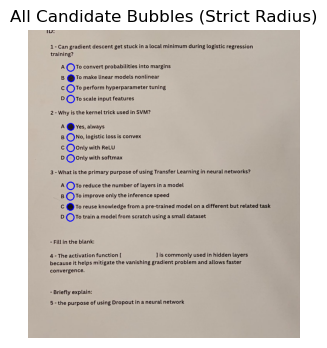

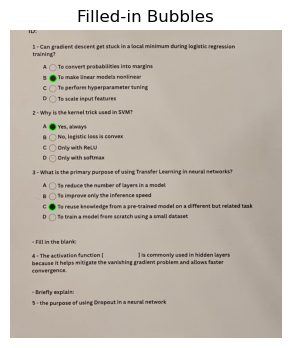

/opt/anaconda3/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 9989 (\N{WHITE HEAVY CHECK MARK}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


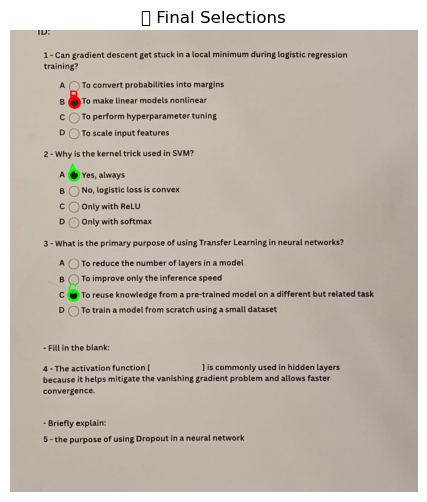

In [4]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from collections import defaultdict
import math

# =========================================
# 1. PARAMETERS
# =========================================
IMG_PATH       = "../content/image8.jpg"
NUM_QUESTIONS  = 3
CHOICES_PER_Q  = 4
ANSWER_KEY     = {1:["A"], 2:["A"], 3:["C"]}
FILL_RATIO_MIN = 0.5   # >50% fill to count

# =========================================
# 2. LOAD & RESIZE
# =========================================
orig    = cv2.imread(IMG_PATH)
assert orig is not None, "Image not found."
resized = cv2.resize(orig, (800, int(orig.shape[0]*800/orig.shape[1])))
gray    = cv2.cvtColor(resized, cv2.COLOR_BGR2GRAY)

# =========================================
# 3. THRESHOLD FOR FILL DETECTION
# =========================================
blur   = cv2.GaussianBlur(gray, (7,7), 0)
thresh = cv2.adaptiveThreshold(
    blur, 255,
    cv2.ADAPTIVE_THRESH_GAUSSIAN_C,
    cv2.THRESH_BINARY_INV,
    11, 2
)

# =========================================
# 4. FIND BUBBLE CANDIDATES (STRICT RADIUS)
# =========================================
cnts, _    = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
candidates = []
for c in cnts:
    area = cv2.contourArea(c)
    if not (200 < area < 5000):
        continue
    (x,y), r = cv2.minEnclosingCircle(c)
    # <<< TIGHTER RADIUS FILTER >>>
    if not (8 < r < 15):
        continue
    candidates.append((int(x), int(y), int(r)))

print(f"🟢 Candidate bubbles found: {len(candidates)}")

# debug: draw candidates
dbg = resized.copy()
for x,y,r in candidates:
    cv2.circle(dbg, (x,y), r, (255,0,0), 2)
plt.figure(figsize=(4,4))
plt.imshow(cv2.cvtColor(dbg,cv2.COLOR_BGR2RGB))
plt.title("All Candidate Bubbles (Strict Radius)"); plt.axis("off")

# =========================================
# 5. FILTER TO ONLY FILLED CIRCLES
# =========================================
filled = []
for idx,(x,y,r) in enumerate(candidates, start=1):
    mask      = np.zeros_like(gray)
    cv2.circle(mask, (x,y), r, 255, -1)
    filled_px = cv2.countNonZero(cv2.bitwise_and(thresh, thresh, mask=mask))
    circle_area = math.pi * (r**2)
    ratio     = filled_px / circle_area
    print(f"Circle#{idx} @({x},{y}) r={r}: ratio={ratio:.2f}")
    if ratio > FILL_RATIO_MIN:
        filled.append((x,y,r))

print(f"✅ Filled circles retained: {len(filled)}")

# debug: draw only filled
dbg2 = resized.copy()
for x,y,r in filled:
    cv2.circle(dbg2, (x,y), r, (0,255,0), 2)
plt.figure(figsize=(4,4))
plt.imshow(cv2.cvtColor(dbg2,cv2.COLOR_BGR2RGB))
plt.title("Filled-in Bubbles"); plt.axis("off")

# =========================================
# 6. SORT FILLED CIRLCES INTO QUESTIONS
# =========================================
assert len(filled) >= NUM_QUESTIONS, f"Expected ≥{NUM_QUESTIONS}, got {len(filled)}"
filled.sort(key=lambda t: t[1])   # top→bottom
filled = filled[:NUM_QUESTIONS]

# =========================================
# 7. ASSIGN LETTER BY COUNTING UNFILLED ABOVE
# =========================================
# rebuild row groups from candidates
groups = defaultdict(list)
for x,y,r in candidates:
    row = min(range(len(filled)), key=lambda i: abs(filled[i][1]-y))
    groups[row].append((x,y,r))

student_answers = {}
for qi, (fx,fy,fr) in enumerate(filled, start=1):
    row = groups[qi-1]
    # count unfilled bubble _candidates_ above the filled one
    above_count = sum(1 for (_, y0, _) in row if y0 < fy)
    above_count = min(above_count, CHOICES_PER_Q-1)
    choice = chr(65 + above_count)
    student_answers[qi] = [choice]
    print(f"🧪 Q{qi}: filled at y={fy}, unfilled above={above_count} → {choice}, correct={ANSWER_KEY[qi][0]}")

# =========================================
# 8. SCORING
# =========================================
score = sum(set(student_answers[q])==set(ANSWER_KEY[q])
            for q in ANSWER_KEY)
print(f"\n📋 Student Answers: {student_answers}")
print(f"🏁 Final Score: {score} / {NUM_QUESTIONS}")

# =========================================
# 9. VISUALIZE FINAL
# =========================================
vis = resized.copy()
for qi,(x,y,r) in enumerate(filled, start=1):
    col = (0,255,0) if student_answers[qi]==ANSWER_KEY[qi] else (0,0,255)
    cv2.circle(vis, (x,y), r, col, 3)
    cv2.putText(vis, student_answers[qi][0], (x-r, y-5),
                cv2.FONT_HERSHEY_SIMPLEX, 0.8, col, 2)

plt.figure(figsize=(6,6))
plt.imshow(cv2.cvtColor(vis,cv2.COLOR_BGR2RGB))
plt.title("✅ Final Selections"); plt.axis("off")
plt.show()